## Practical 4. GloVe models
### Strictly used for internal purpose in Singapore Polytechnic. Do not disclose!

In [1]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## Loading the Vectors
Using the Wikipedia 2014 + Gigaword 5 vectors GloVe model, glove.6B.50d.txt
Each line of the text file contains a word, followed by N numbers. The N numbers describe the vector of the word

In [12]:
embeddings_dict = {}  # a dictionary to hold the mapping betweens words and vectors
with open("glove.6B/glove.6B.50d.txt", 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

In [31]:
embeddings_dict['king']  # vectors of word "king", dimension is 50

array([ 0.50451 ,  0.68607 , -0.59517 , -0.022801,  0.60046 , -0.13498 ,
       -0.08813 ,  0.47377 , -0.61798 , -0.31012 , -0.076666,  1.493   ,
       -0.034189, -0.98173 ,  0.68229 ,  0.81722 , -0.51874 , -0.31503 ,
       -0.55809 ,  0.66421 ,  0.1961  , -0.13495 , -0.11476 , -0.30344 ,
        0.41177 , -2.223   , -1.0756  , -1.0783  , -0.34354 ,  0.33505 ,
        1.9927  , -0.04234 , -0.64319 ,  0.71125 ,  0.49159 ,  0.16754 ,
        0.34344 , -0.25663 , -0.8523  ,  0.1661  ,  0.40102 ,  1.1685  ,
       -1.0137  , -0.21585 , -0.15155 ,  0.78321 , -0.91241 , -1.6106  ,
       -0.64426 , -0.51042 ], dtype=float32)

## Finding Similar Vectors
Another thing we can do with GloVe vectors is find the most similar words to a given word.

In [25]:
def find_closest_embeddings(embedding):
    return sorted(embeddings_dict.keys(), key=lambda word: spatial.distance.euclidean(embeddings_dict[word], embedding))

In [28]:
find_closest_embeddings(embeddings_dict["king"])[1:6]  # top 5 words closest to "king"

['prince', 'queen', 'uncle', 'ii', 'grandson']

## Math with Words
Since we already turn any word into a vector, we can use any math operation usable on vectors, on words.

For example, we can add and subtract two words together, just like numbers. i.e., twig-branch+hand ≈ finger

In [34]:
print(find_closest_embeddings(
    embeddings_dict["twig"] - embeddings_dict["branch"] + embeddings_dict["hand"]
)[:5])

['fingernails', 'toenails', 'stringy', 'peeling', 'shove']


In [37]:
print(find_closest_embeddings(
    embeddings_dict["king"] - embeddings_dict["man"] + embeddings_dict['woman'])[:5])

['king', 'queen', 'prince', 'elizabeth', 'daughter']


## Visualizing the Word Vectors
To visualize the vectors, we will use a method known as t-distributed stochastic neighbor embedding, also known as t-SNE. t-SNE will allow us to reduce the50 dimensions of the data, down to 2 dimensions

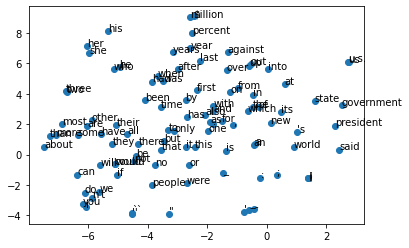

In [46]:
tsne = TSNE(n_components=2, random_state=0)
words =  list(embeddings_dict.keys())
vectors = [embeddings_dict[word] for word in words]
Y = tsne.fit_transform(vectors[0:100])
plt.scatter(Y[:, 0], Y[:, 1])

for label, x, y in zip(words, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")
plt.show()

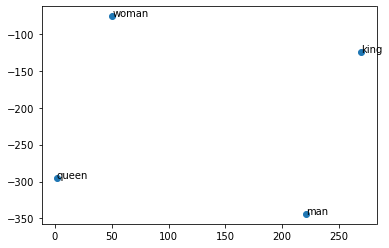

In [44]:
tsne = TSNE(n_components=2, random_state=0)
words =  ['king', 'queen', 'man', 'woman']
vectors = [embeddings_dict[word] for word in words]
Y = tsne.fit_transform(vectors)
plt.scatter(Y[:, 0], Y[:, 1])

for label, x, y in zip(words, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")
plt.show()

One important usage that was not mentioned above is loading an embedding layer at the start of a Natural Language Processing model, with these vectors. That would, in theory, considerably increase the accuracy of the model, and save time training a new embedding from scratch.